In [21]:
pip install numba==0.53

     |████████████████████████████████| 2.2 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 18.5 MB 10.4 MB/s eta 0:00:01
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
    Uninstalling llvmlite-0.38.0:
      Successfully uninstalled llvmlite-0.38.0
  Attempting uninstall: numba
    Found existing installation: numba 0.55.1
    Uninstalling numba-0.55.1:
      Successfully uninstalled numba-0.55.1
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install tensorflow.python.platform

ERROR: Could not find a version that satisfies the requirement tensorflow.python.platform (from versions: none)
ERROR: No matching distribution found for tensorflow.python.platform
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import zipfile

ModuleNotFoundError: No module named 'tensorflow.python.platform'

In [2]:
# Paths for data.
Ravdess = "../input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
Crema = "../input/cremad/AudioWAV/"
Tess = "../input/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
Savee = "../input/surrey-audiovisual-expressed-emotion-savee/ALL/"

In [3]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,../input/ravdess-emotional-speech-audio/audio_...
1,neutral,../input/ravdess-emotional-speech-audio/audio_...
2,disgust,../input/ravdess-emotional-speech-audio/audio_...
3,disgust,../input/ravdess-emotional-speech-audio/audio_...
4,neutral,../input/ravdess-emotional-speech-audio/audio_...


In [4]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,disgust,../input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,happy,../input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,happy,../input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,disgust,../input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,disgust,../input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [5]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,fear,../input/toronto-emotional-speech-set-tess/tes...
1,fear,../input/toronto-emotional-speech-set-tess/tes...
2,fear,../input/toronto-emotional-speech-set-tess/tes...
3,fear,../input/toronto-emotional-speech-set-tess/tes...
4,fear,../input/toronto-emotional-speech-set-tess/tes...


In [6]:
savee_directory_list = os.listdir(Savee)

file_emotion = []
file_path = []

for file in savee_directory_list:
    file_path.append(Savee + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()

,Emotions,Path
0,happy,../input/surrey-audiovisual-expressed-emotion-...
1,fear,../input/surrey-audiovisual-expressed-emotion-...
2,happy,../input/surrey-audiovisual-expressed-emotion-...
3,disgust,../input/surrey-audiovisual-expressed-emotion-...
4,angry,../input/surrey-audiovisual-expressed-emotion-...


In [7]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,surprise,../input/ravdess-emotional-speech-audio/audio_...
1,neutral,../input/ravdess-emotional-speech-audio/audio_...
2,disgust,../input/ravdess-emotional-speech-audio/audio_...
3,disgust,../input/ravdess-emotional-speech-audio/audio_...
4,neutral,../input/ravdess-emotional-speech-audio/audio_...


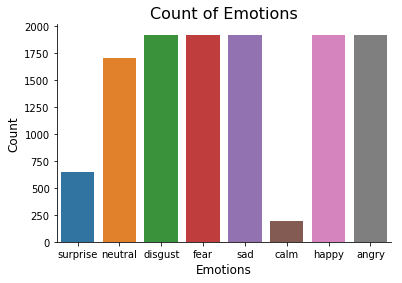

In [8]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

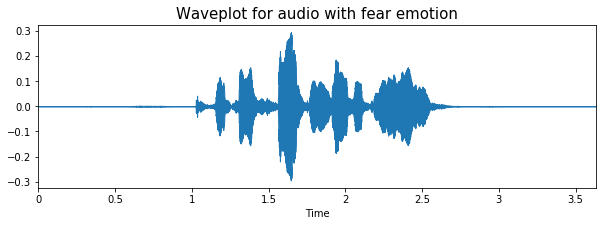

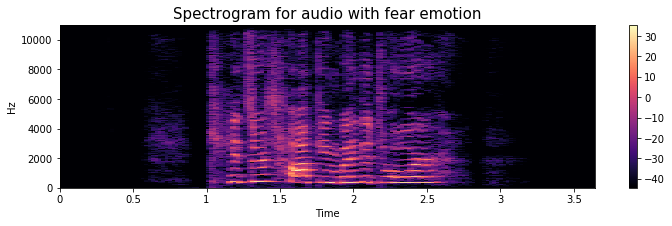

In [10]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

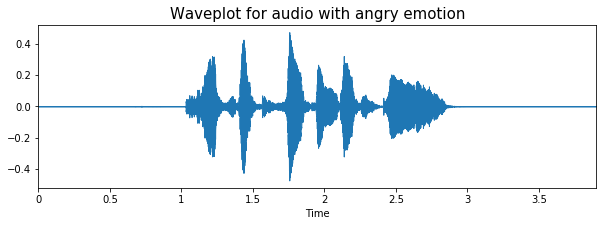

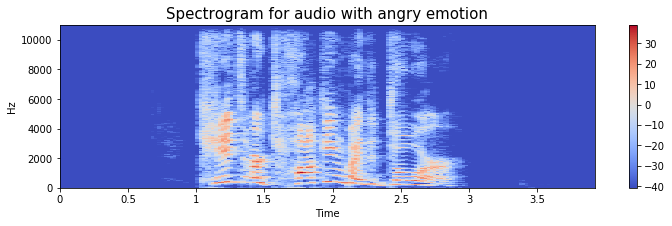

In [11]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

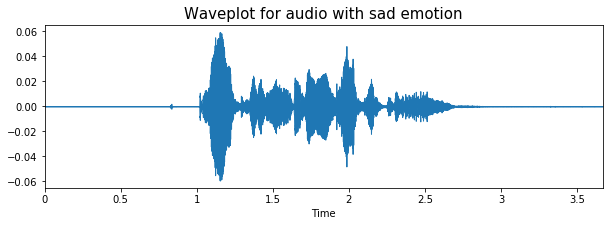

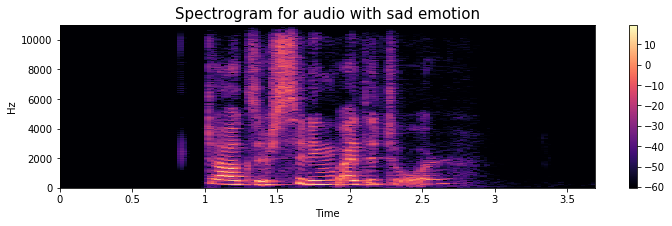

In [12]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

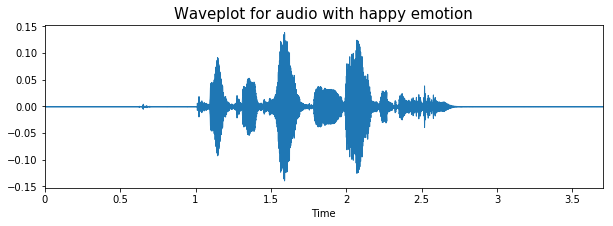

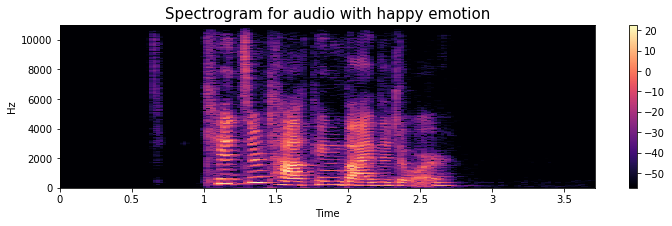

In [13]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [14]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

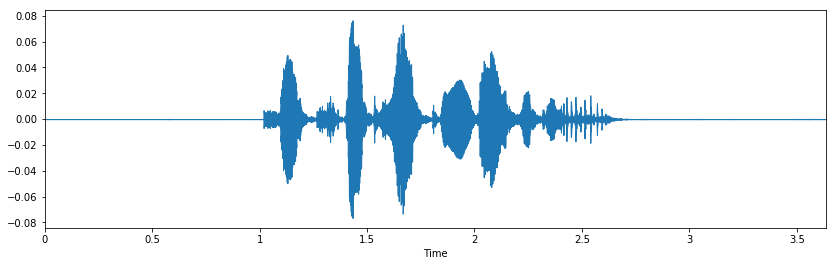

In [15]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

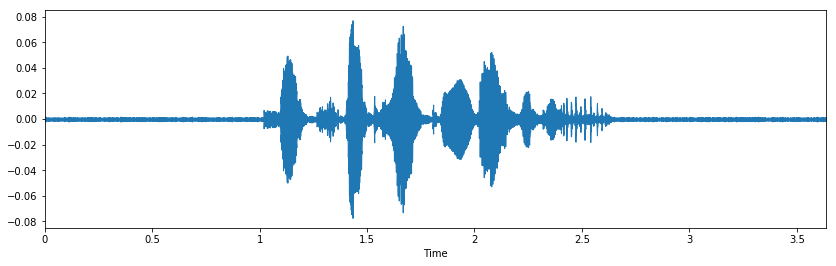

In [16]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

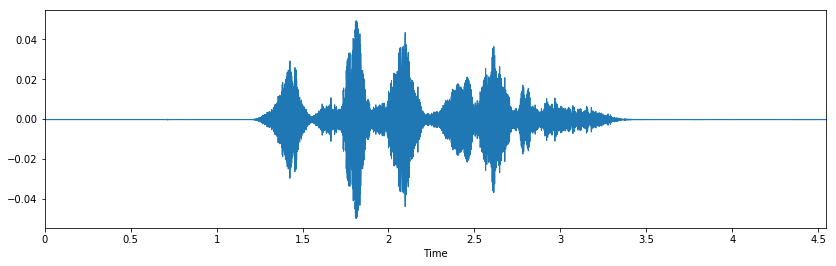

In [17]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [19]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [20]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.236364,0.682681,0.670631,0.614893,0.577180,0.557824,0.635630,0.667002,0.664258,0.670328,...,0.000234,0.000236,0.000138,0.000129,0.000300,0.000354,0.000212,0.000081,1.317474e-05,surprise
1,0.313472,0.716011,0.727644,0.707678,0.698455,0.725264,0.706207,0.700839,0.680998,0.688222,...,0.000766,0.000768,0.000637,0.000615,0.000810,0.000856,0.000724,0.000552,4.829966e-04,surprise
2,0.173220,0.671857,0.640039,0.576224,0.517680,0.501735,0.615095,0.679818,0.680888,0.671640,...,0.000044,0.000046,0.000047,0.000038,0.000026,0.000034,0.000044,0.000017,8.118935e-07,surprise
3,0.249344,0.623057,0.581343,0.598568,0.622959,0.593760,0.598832,0.650681,0.699159,0.683510,...,0.000018,0.000016,0.000013,0.000012,0.000007,0.000008,0.000007,0.000002,2.394534e-07,neutral
4,0.351047,0.722944,0.727315,0.744607,0.799172,0.772395,0.724161,0.683469,0.731546,0.744416,...,0.000510,0.000521,0.000528,0.000509,0.000511,0.000472,0.000491,0.000498,5.010050e-04,neutral


In [21]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [22]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [23]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [24]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [25]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162, 1), (27364, 8), (9122, 162, 1), (9122, 8))

In [26]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=8, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 81, 256)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 41, 256)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 21, 128)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 21, 128)          

In [27]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

Train on 27364 samples, validate on 9122 samples
Epoch 1/50
27364/27364 [==============================] - 7s 257us/step - loss: 1.6764 - accuracy: 0.3177 - val_loss: 1.4238 - val_accuracy: 0.4276
Epoch 2/50
27364/27364 [==============================] - 4s 164us/step - loss: 1.4244 - accuracy: 0.4296 - val_loss: 1.2910 - val_accuracy: 0.4817
Epoch 3/50
27364/27364 [==============================] - 4s 152us/step - loss: 1.3386 - accuracy: 0.4677 - val_loss: 1.2588 - val_accuracy: 0.4951
Epoch 4/50
27364/27364 [==============================] - 4s 156us/step - loss: 1.2864 - accuracy: 0.4836 - val_loss: 1.2264 - val_accuracy: 0.5081
Epoch 5/50
27364/27364 [==============================] - 4s 151us/step - loss: 1.2422 - accuracy: 0.5006 - val_loss: 1.1617 - val_accuracy: 0.5294
Epoch 6/50
27364/27364 [==============================] - 4s 150us/step - loss: 1.2157 - accuracy: 0.5132 - val_loss: 1.1553 - val_accuracy: 0.5289
Epoch 7/50
27364/27364 [==============================] - 4s 15

9122/9122 [==============================] - 1s 104us/step
Accuracy of our model on test data :  62.223196029663086 %


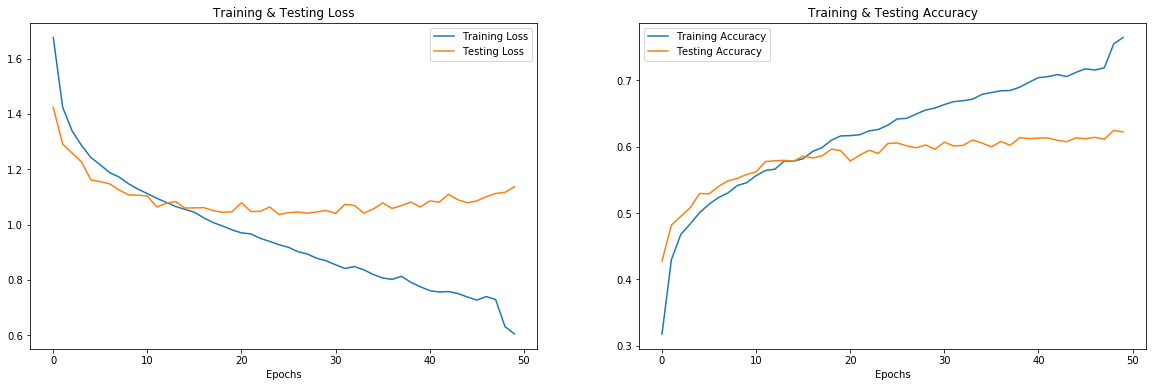

In [28]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [29]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

In [30]:
model.save("model2.h5")

In [31]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

,Predicted Labels,Actual Labels
0,sad,disgust
1,neutral,neutral
2,fear,fear
3,happy,angry
4,fear,fear
5,sad,disgust
6,surprise,angry
7,disgust,disgust
8,fear,disgust
9,neutral,neutral


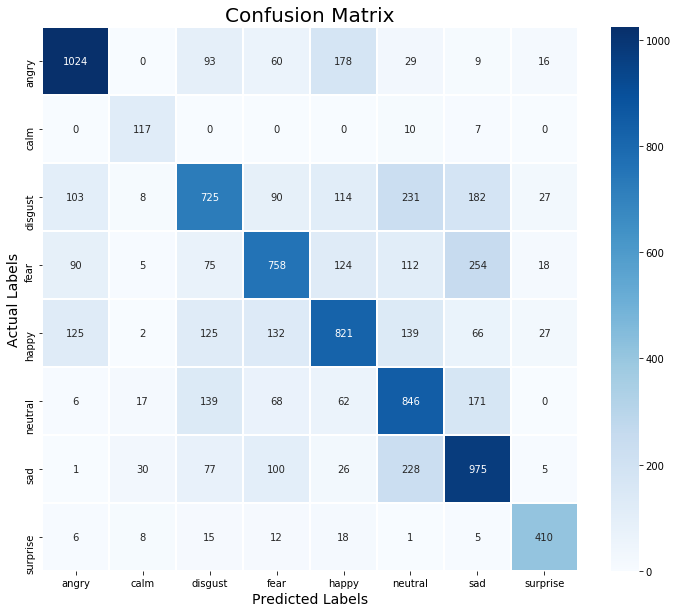

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.76      0.73      0.74      1409
        calm       0.63      0.87      0.73       134
     disgust       0.58      0.49      0.53      1480
        fear       0.62      0.53      0.57      1436
       happy       0.61      0.57      0.59      1437
     neutral       0.53      0.65      0.58      1309
         sad       0.58      0.68      0.63      1442
    surprise       0.82      0.86      0.84       475

    accuracy                           0.62      9122
   macro avg       0.64      0.67      0.65      9122
weighted avg       0.63      0.62      0.62      9122

